# Instalación de librerias necesarias

In [1]:
!pip install cupy-cuda12x
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 -q

print("Instalación completada")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.7/848.7 MB 2.3 MB/s eta 0:00:00
Instalación completada


Se hace necesario conocer la versión de CUDA y de la del compilador para que el gestor tenga versiones compatibles

In [2]:
# Verificar versión CUDA
!nvidia-smi
print("\n" + "="*50)
!nvcc --version

Sun Jul  6 03:49:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Eliminar si ya existía el repo o carpeta
!rm -rf Trabajo_Final_SO
# Clonar el repositorio completo
!git clone https://github.com/brandugar/Trabajo_Final_SO.git
!mv Trabajo_Final_SO/matrices ./
import os
print("Contenido de 'matrices/':", os.listdir("matrices"))

Cloning into 'Trabajo_Final_SO'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 214 (delta 7), reused 0 (delta 0), pack-reused 194 (from 1)
Receiving objects: 100% (214/214), 6.36 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Contenido de 'matrices/': ['matriz_100x100_invertible.csv', 'matriz_400x400_invertible.csv', 'matriz_10x10_invertible.csv', 'matriz_250x250_invertible.csv', 'matriz_150x150_invertible.csv', 'matriz_500x500_invertible.csv', 'matriz_200x200_invertible.csv', 'matriz_300x300_invertible.csv', 'def_pos_inv', 'matriz_450x450_invertible.csv', 'matriz_50x50_invertible.csv', 'matriz_350x350_invertible.csv']


In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Verificar CuPy disponibilidad
try:
    import cupy as cp
    GPU_CUPY_AVAILABLE = True
    print("CuPy disponible")
    print(f"   GPU: {cp.cuda.runtime.getDeviceProperties(0)['name'].decode()}")
    print(f"   Memoria: {cp.cuda.runtime.memGetInfo()[1] / 1024**3:.1f} GB")
except ImportError:
  #No se pudo trabajar con CUDA, cambiar la versión o el entorno de ejecución
    GPU_CUPY_AVAILABLE = False
    print("   CuPy no disponible")

# Verificar PyTorch
try:
  #Verificación del paquete pytorch para calculos con GPU
    import torch
    GPU_TORCH_AVAILABLE = torch.cuda.is_available()
    if GPU_TORCH_AVAILABLE:
        print("    PyTorch GPU disponible")
        print(f"   GPU: {torch.cuda.get_device_name(0)}")
        print(f"   Memoria: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    else:
      #A cambiar el entorno de ejecución
        print("   PyTorch GPU no disponible")
except ImportError:
    GPU_TORCH_AVAILABLE = False
    print("    PyTorch no disponible")

print(f"\n Estado: CuPy={GPU_CUPY_AVAILABLE}, PyTorch={GPU_TORCH_AVAILABLE}")

CuPy disponible
   GPU: Tesla T4
   Memoria: 14.7 GB
    PyTorch GPU disponible
   GPU: Tesla T4
   Memoria: 14.7 GB

 Estado: CuPy=True, PyTorch=True


In [10]:
def leer_matriz_csv(tamaño, carpeta="matrices"):
    """
    Lee una matriz cuadrada desde un archivo CSV.
    """
    nombre_archivo = f"matriz_{tamaño}x{tamaño}_invertible.csv"
    ruta = os.path.join(carpeta, nombre_archivo)

    if not os.path.exists(ruta):
        raise FileNotFoundError(f"No se encontró el archivo: {ruta}")

    matriz = pd.read_csv(ruta, header=None).values.astype(np.float32)

    if matriz.shape[0] != matriz.shape[1]:
        raise ValueError("La matriz no es cuadrada.")

    return matriz

# Definición de la clase GPUMatrixInverter

Está diseñada para realizar la inversión de matrices utilizando la aceleración de GPU con CuPy (para GPUs NVIDIA) y PyTorch, usando los paquetes propios de cada libreria, llamando metodos de inversa y pseudo inversa.

## Comparación de metodos
En este caso, el método `compare_methods` se encarga de evaluar y comparar el rendimiento de diferentes librerías y algoritmos para el cálculo de la inversa de una matriz. Su objetivo principal es mostrar cuál método es más rápido y preciso para una matriz dada, aprovechando tanto la CPU como la GPU si están disponibles.

## Resultados
Se hace importante mencionar los valores de el diccionario `results`

* `time`: Esta variable representa el tiempo que tardó el método en calcular la  inversa de la matriz A. Se mide en segundos y se obtiene restando start_time (el momento en que comenzó el cálculo) de end_time (el momento en que terminó el cálculo). Un valor más bajo indica que el método es más rápido.

* `valid`: Esta es una variable booleana (es decir, puede ser True o False) que indica si la inversa calculada es considerada "válida" o suficientemente precisa. Se determina usando `np.allclose(A @ inv_matrix, np.eye(len(A)), atol=1e-5)`.

  * `np.allclose` compara dos arreglos (en este caso, el producto de A y inv_matrix con la matriz identidad) y devuelve True si son iguales dentro de una tolerancia específica (atol=1e-5).

  * Un valor de True significa que la matriz multiplicada por su inversa es muy cercana a la matriz identidad, lo que sugiere un buen resultado. False indica que la precisión no es suficiente.

* `error`: Como ya vimos, esta variable representa el máximo error absoluto entre el producto de la matriz original y su inversa calculada, y la matriz identidad. Un error más cercano a cero indica una mayor precisión en el cálculo de la inversa.

* `inverse`: Esta variable contiene la matriz inversa real calculada por el método correspondiente. Es decir, es el resultado directo de la función `method(A.copy())`. Esta es la matriz que, al multiplicarse por A, debería dar como resultado la matriz identidad (o algo muy cercano a ella).

In [6]:
class InversorGeneralGPU:
    def cupy_inverse(self, A):
        if not GPU_CUPY_AVAILABLE:
            raise RuntimeError("CuPy no disponible")
        A_gpu = cp.asarray(A, dtype=cp.float32)
        return cp.asnumpy(cp.linalg.inv(A_gpu))

    def cupy_pinv(self, A):
        if not GPU_CUPY_AVAILABLE:
            raise RuntimeError("CuPy no disponible")
        A_gpu = cp.asarray(A, dtype=cp.float32)
        return cp.asnumpy(cp.linalg.pinv(A_gpu))

    def torch_inverse(self, A):
        if not GPU_TORCH_AVAILABLE:
            raise RuntimeError("PyTorch no disponible")
        A_tensor = torch.tensor(A, dtype=torch.float32, device='cuda')
        return torch.linalg.inv(A_tensor).cpu().numpy()

    def torch_pinv(self, A):
        if not GPU_TORCH_AVAILABLE:
            raise RuntimeError("PyTorch no disponible")
        A_tensor = torch.tensor(A, dtype=torch.float32, device='cuda')
        return torch.linalg.pinv(A_tensor).cpu().numpy()

    def numpy_inverse(self, A):
        return np.linalg.inv(A)


# Funciones de utilidad





In [24]:
def compare_methods_unificado(A, show_details=True):
    """
    Compara métodos de inversión usando exactamente el mismo estilo de medición que la implementación original.
    """
    inversor = InversorGeneralGPU()
    resultados = {}

    metodos = {
        'NumPy Inv': inversor.numpy_inverse
    }

    if GPU_CUPY_AVAILABLE:
        metodos['CuPy Inv'] = inversor.cupy_inverse
        metodos['CuPy Pinv'] = inversor.cupy_pinv

    if GPU_TORCH_AVAILABLE:
        metodos['PyTorch Inv'] = inversor.torch_inverse
        metodos['PyTorch Pinv'] = inversor.torch_pinv

    for nombre, metodo in metodos.items():
        try:
            # WARMUP fuera de medición
            try:
                _ = metodo(np.eye(min(100, A.shape[0]), dtype=np.float32))
            except Exception:
                pass

            # Pre-sincronización
            if 'CuPy' in nombre and GPU_CUPY_AVAILABLE:
                cp.cuda.runtime.deviceSynchronize()
            if 'PyTorch' in nombre and GPU_TORCH_AVAILABLE:
                torch.cuda.synchronize()

            inicio = time.time()
            inversa = metodo(A.copy())
            # Post-sincronización
            if 'CuPy' in nombre and GPU_CUPY_AVAILABLE:
                cp.cuda.runtime.deviceSynchronize()
            if 'PyTorch' in nombre and GPU_TORCH_AVAILABLE:
                torch.cuda.synchronize()
            fin = time.time()

            identidad = np.eye(A.shape[0], dtype=np.float32)
            valido = np.allclose(A @ inversa, identidad, atol=1e-3)
            error = np.max(np.abs(A @ inversa - identidad))

            resultados[nombre] = {
                'tiempo': fin - inicio,
                'valido': valido,
                'error': error
            }

            if show_details:
                print(f"{nombre}:")
                print(f"  Tiempo: {fin - inicio:.6f}s")
                print(f"  Válido: {valido}")
                print(f"  Error: {error:.2e}")
                print()

        except Exception as e:
            resultados[nombre] = {
                'tiempo': None,
                'valido': False,
                'error': str(e)
            }
            if show_details:
                print(f"{nombre}: Error - {e}")

    return resultados


In [8]:
def graficar_resultados(resultados):
    df = pd.DataFrame(resultados)
    df_filtrado = df.dropna(subset=['tiempo'])

    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df_filtrado, x='tamaño', y='tiempo', hue='librería', marker='o')
    plt.title('Tiempo de Inversión por Tamaño y Librería')
    plt.xlabel('Tamaño de la Matriz')
    plt.ylabel('Tiempo (s)')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    return df


In [ ]:
###CASOS DE USO

#Uso del codigo

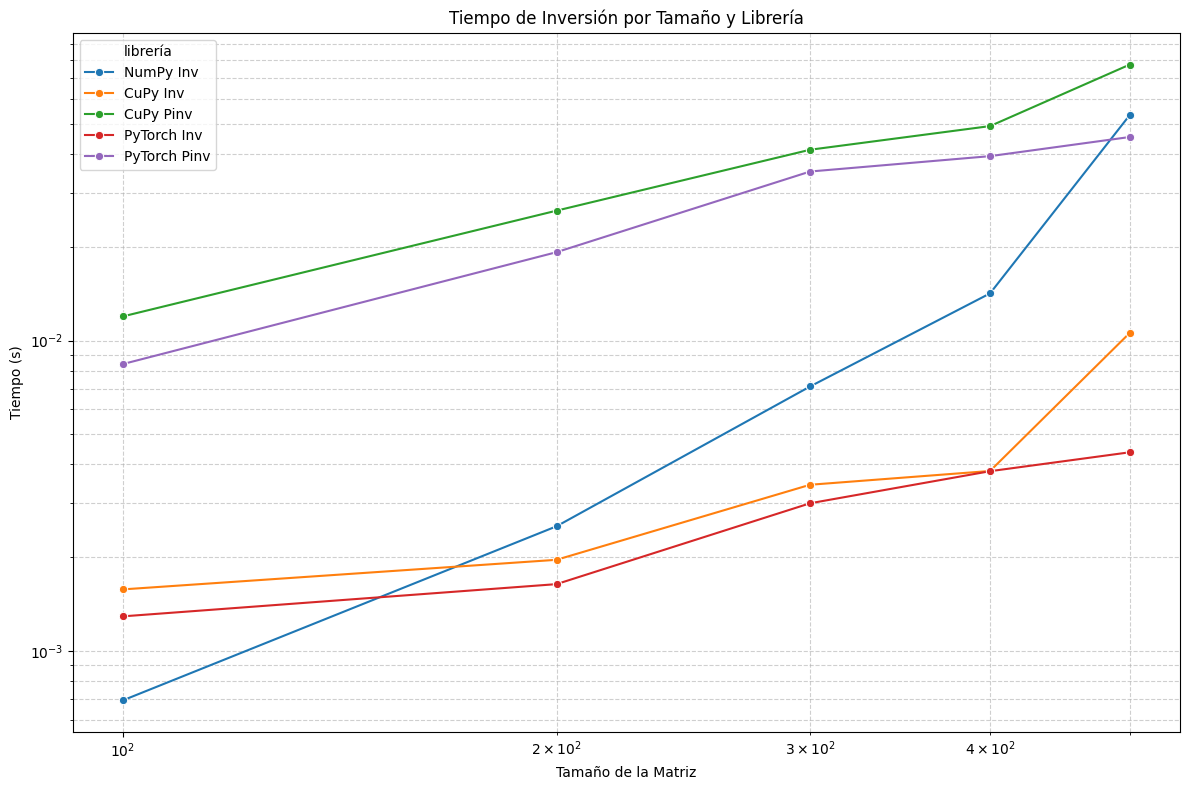

,tamaño,librería,tiempo,error
0,100,CuPy Inv,0.001577,0.000042
1,100,CuPy Pinv,0.011963,0.000047
2,100,NumPy Inv,0.000692,0.000009
3,100,PyTorch Inv,0.001291,0.000031
4,100,PyTorch Pinv,0.008399,0.000037
5,200,CuPy Inv,0.001965,0.000008
6,200,CuPy Pinv,0.026217,0.000003
7,200,NumPy Inv,0.002519,0.000001
8,200,PyTorch Inv,0.001640,0.000010
9,200,PyTorch Pinv,0.019265,0.000006


In [25]:
import pandas as pd
import seaborn as sns
tamaños = [100, 200, 300, 400, 500]
resultados = medir_tiempos_gpu_general(tamaños)

# Gráfica y tabla
df_resultados = graficar_resultados(resultados)
df_resultados.sort_values(by=["tamaño", "librería"]).reset_index(drop=True)

#Grafica del benchmark

#Funcionamiento
La función `analyze_gpu_memory` está diseñada para inspeccionar y reportar el uso actual de la memoria de la GPU. Su propósito es mostrar cómo se asigna y libera la memoria cuando se utilizan CuPy y PyTorch, dos librerías populares para computación en GPU con Python. Ayuda a entender si tu GPU está siendo utilizada de manera eficiente.

In [16]:
def analyze_gpu_memory():
    """Analizar uso de memoria GPU"""
    if GPU_CUPY_AVAILABLE:
        print(" Análisis de memoria CuPy:")

        # Memoria antes
        free_before, total = cp.cuda.runtime.memGetInfo()
        used_before = total - free_before

        print(f"  Memoria total: {total / 1024**3:.1f} GB")
        print(f"  Memoria usada: {used_before / 1024**3:.1f} GB")
        print(f"  Memoria libre: {free_before / 1024**3:.1f} GB")

        # Crear matriz grande en GPU
        size = 1000
        A_gpu = cp.random.randn(size, size, dtype=cp.float32)

        # Memoria después
        free_after, _ = cp.cuda.runtime.memGetInfo()
        used_after = total - free_after

        print(f"\n  Después de crear matriz {size}x{size}:")
        print(f"  Memoria usada: {used_after / 1024**3:.1f} GB")
        print(f"  Memoria utilizada: {(used_after - used_before) / 1024**3:.3f} GB")

        # Limpiar
        del A_gpu
        cp.cuda.runtime.deviceSynchronize()

    if GPU_TORCH_AVAILABLE:
        print("\n Análisis de memoria PyTorch:")
        print(f"  Memoria total: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
        print(f"  Memoria asignada: {torch.cuda.memory_allocated() / 1024**3:.3f} GB")
        print(f"  Memoria reservada: {torch.cuda.memory_reserved() / 1024**3:.3f} GB")

analyze_gpu_memory()

 Análisis de memoria CuPy:
  Memoria total: 14.7 GB
  Memoria usada: 0.2 GB
  Memoria libre: 14.5 GB

  Después de crear matriz 1000x1000:
  Memoria usada: 0.2 GB
  Memoria utilizada: 0.004 GB

 Análisis de memoria PyTorch:
  Memoria total: 14.7 GB
  Memoria asignada: 0.008 GB
  Memoria reservada: 0.025 GB
